In [36]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 200.0,
    'font.size': 12.0,
})


In [37]:
df = pd.read_csv(r'1-monte-carlo-data.csv')
pc = df['points_count']
time = {}

for i in range(1, len(df.columns)):
    title = df.columns[i]
    time[f'{i} thread'] = df[title]

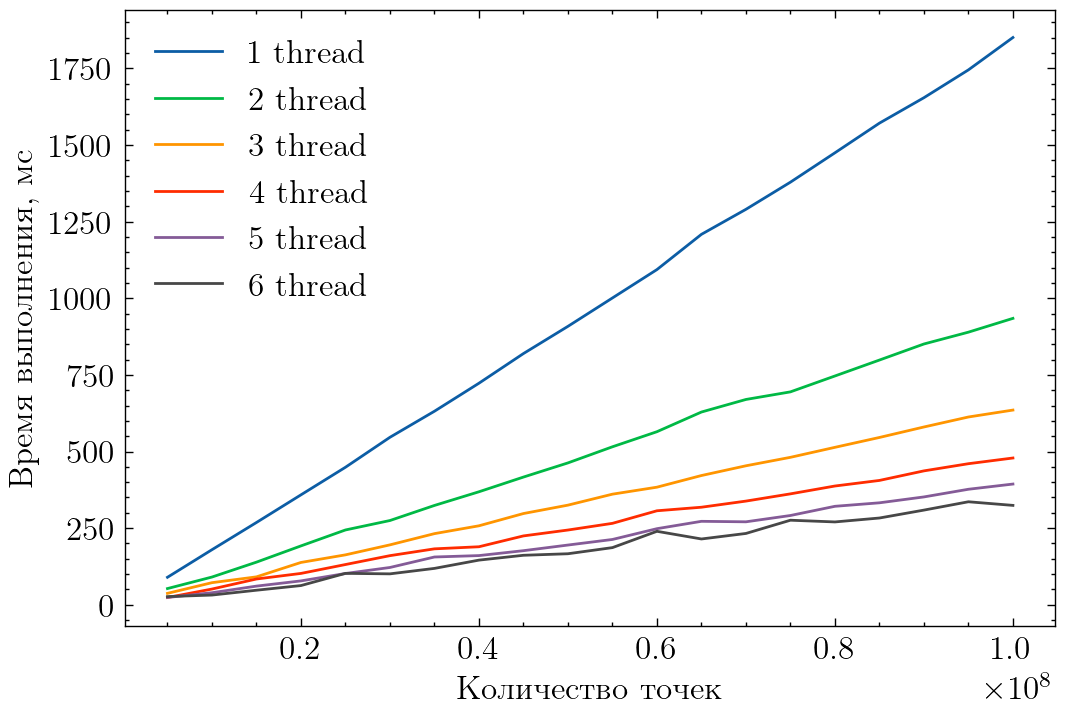

In [38]:
for key in time.keys():
    plt.plot(pc, time[key], label=key)
    
plt.xlabel('Количество точек')
plt.ylabel('Время выполнения, мс')
plt.legend()

plt.savefig('1-proof.png')
plt.show()

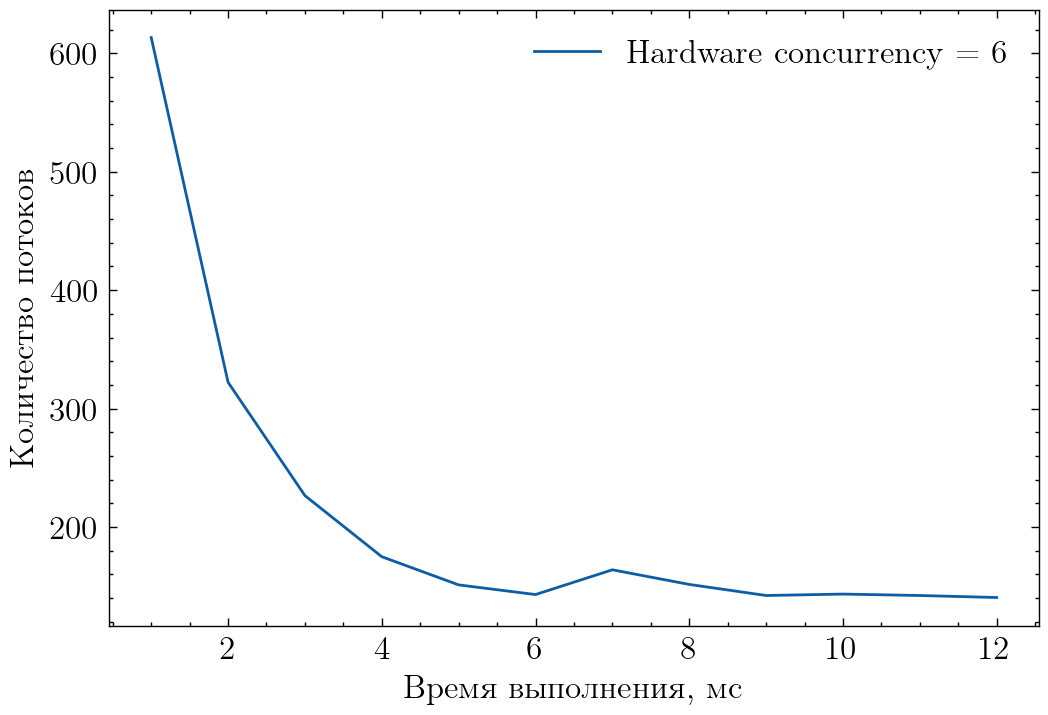

In [39]:
df = pd.read_csv(r'2-accumulate-pt-data.csv')
nt = df['num_threads']
time = df['time']

plt.plot(nt, time, label='Hardware concurrency = 6')
    
plt.xlabel('Время выполнения, мс')
plt.ylabel('Количество потоков')
plt.legend()

plt.savefig('2-proof.png')
plt.show()

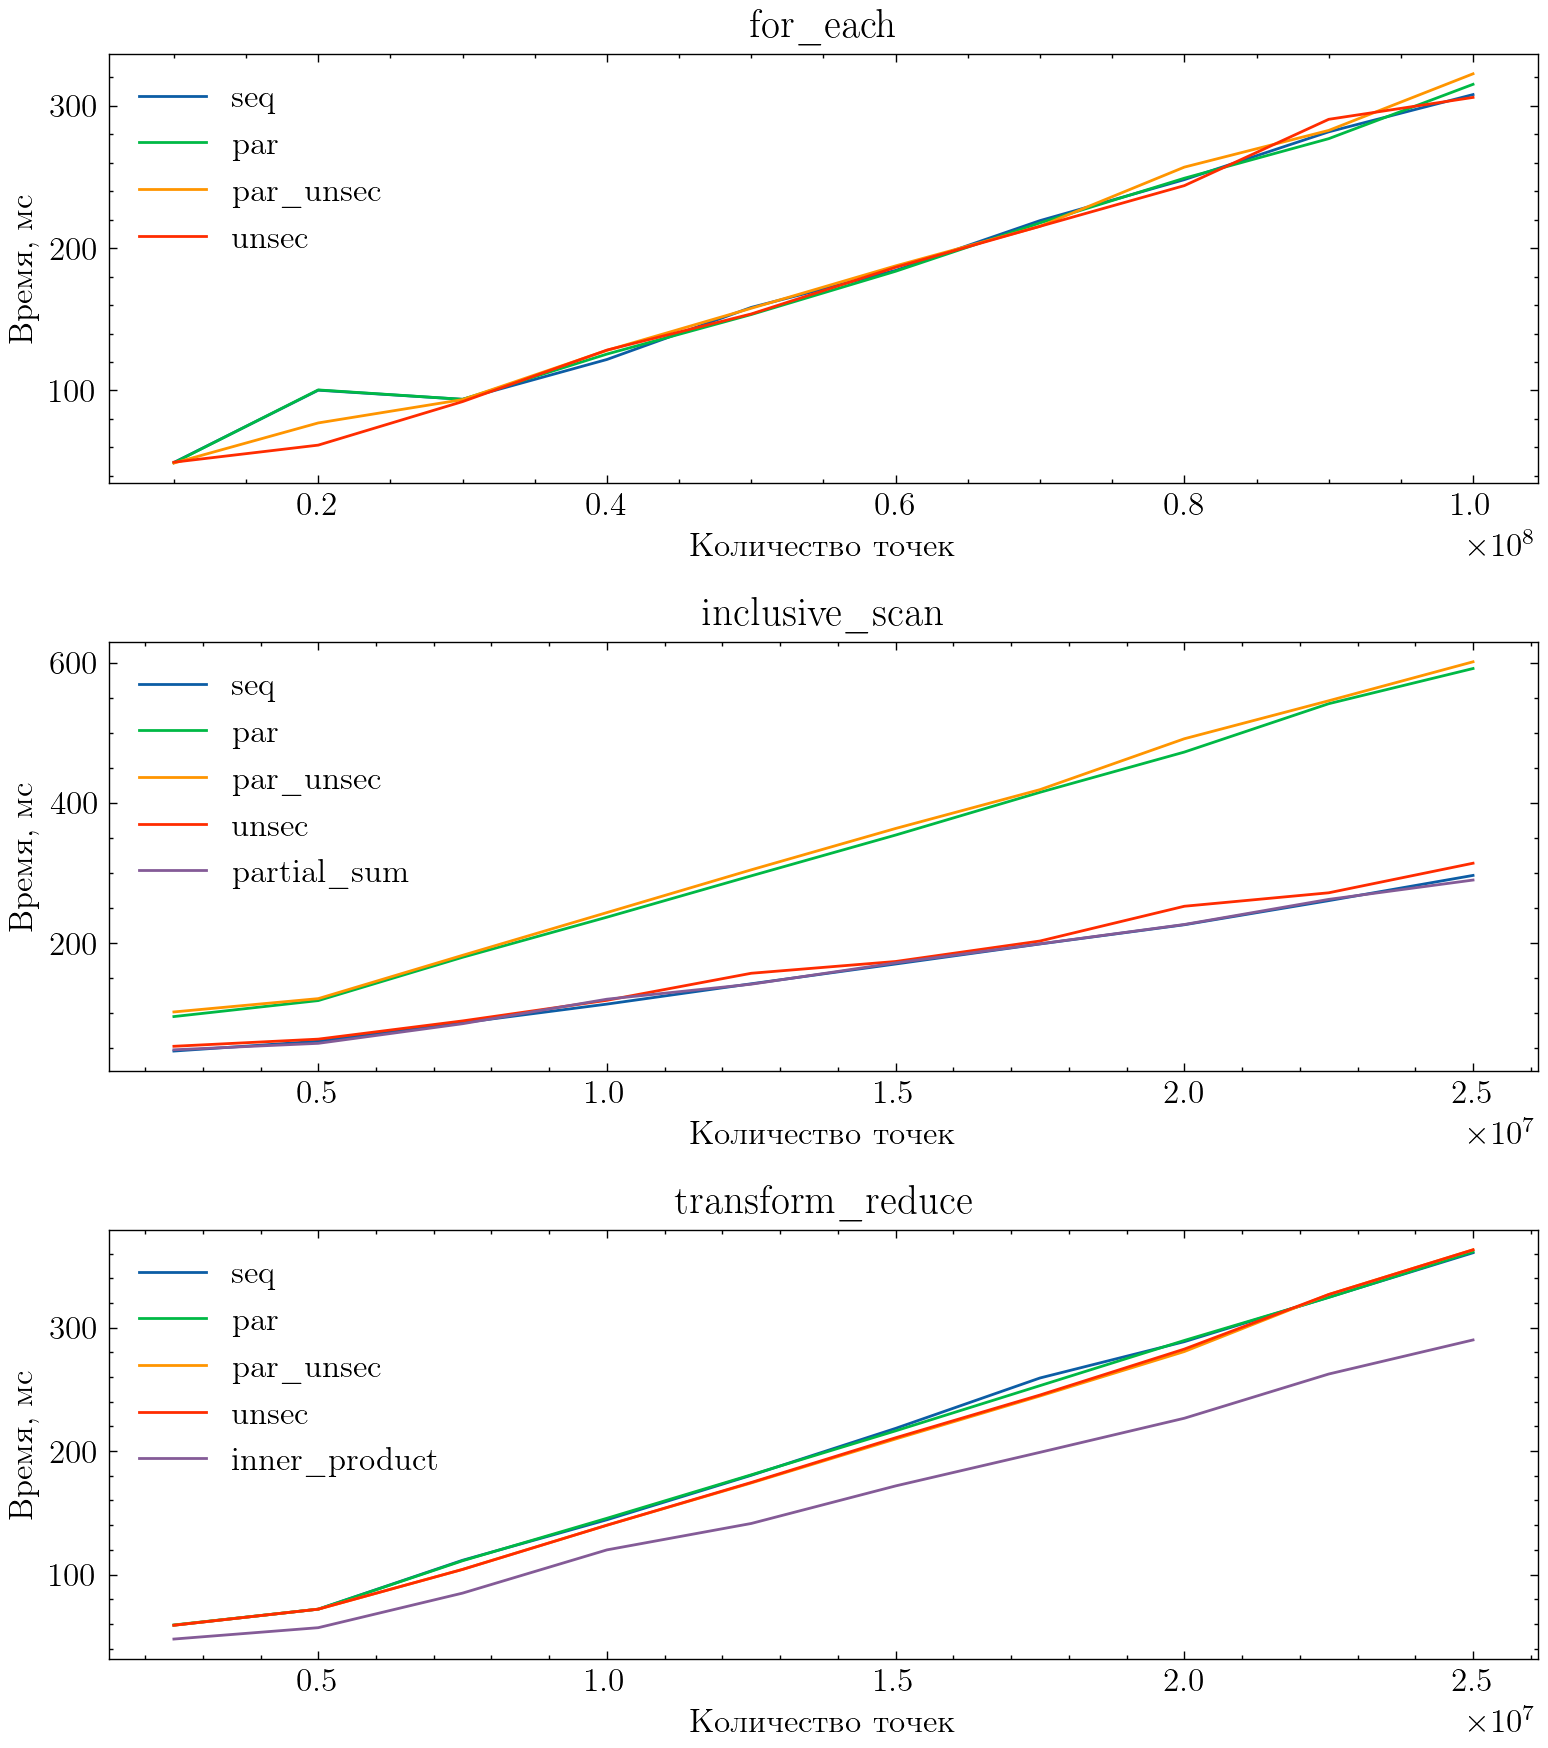

In [57]:
df = pd.read_csv(r'4-data.csv')
pc = df['points_count']

for_each = df.columns[1:5]
partial_sum = df.columns[5]
inclusive_scan = df.columns[6:10]
inner_product = df.columns[10]
transform_reduce = df.columns[11:15]

fig, axes = plt.subplots(3, 1, figsize=(8,9))

for t in for_each:
    axes[0].plot(pc, df[t], label=t.split()[1])
axes[0].set_title('for_each')

for t in inclusive_scan:
    axes[1].plot(pc / 4, df[t], label=t.split()[1])
axes[1].set_title('inclusive_scan')
axes[1].plot(pc / 4, df[partial_sum], label='partial_sum')

for t in transform_reduce:
    axes[2].plot(pc / 4, df[t], label=t.split()[1])
axes[2].set_title('transform_reduce')
axes[2].plot(pc / 4, df[partial_sum], label='inner_product')

for ax in axes:
    ax.legend()
    ax.set_xlabel('Количество точек')
    ax.set_ylabel('Время, мс')

fig.tight_layout()
plt.savefig('4-proof.png')
plt.show()